In [1]:
%matplotlib inline

In [2]:
from datetime import datetime
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

mpl.rcParams['figure.figsize'] = [8, 5]

## Hospitalisation data provided by [Ireland's COVID-19 Data Hub](https://covid-19.geohive.ie/)

This notebook uses the [Covid19AcuteHospitalHistoricSummaryOpenData](https://covid-19.geohive.ie/datasets/fe9bb23592ec4142a4f4c2c9bd32f749_0) dataset, which contains a range of COVID-19 related indicators for Acute Hospitals in Ireland. Data is provided for Confirmed COVID-19 cases and the number of new admissions and discharges. Data is based on an aggregate of 29 Acute Hospitals. Data has been provided by the HSE Performance Management Improvement Unit (PMIU).

A snapshot of this data was saved on 2021/03/22, and is used to perform some exploratory analysis of age group hospitalisation.

In [5]:
df = pd.read_csv('./data/CovidStatisticsProfileHPSCIrelandOpenData.csv', parse_dates=["Date", "StatisticsProfileDate"], date_parser=lambda x: datetime.strptime(x, "%Y/%m/%d %H:%M:%S+00"))

In [6]:
df.head()

,X,Y,Date,ConfirmedCovidCases,TotalConfirmedCovidCases,ConfirmedCovidDeaths,TotalCovidDeaths,StatisticsProfileDate,CovidCasesConfirmed,HospitalisedCovidCases,...,CommunityTransmission,CloseContact,TravelAbroad,FID,HospitalisedAged65to74,HospitalisedAged75to84,HospitalisedAged85up,Aged65to74,Aged75to84,Aged85up
0,-7.692596,53.288234,2020-02-29,1,1,0.0,0,2020-02-27,NaN,NaN,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,-7.692596,53.288234,2020-03-03,1,2,0.0,0,2020-03-01,NaN,NaN,...,0,0,0,2,NaN,NaN,NaN,NaN,NaN,NaN
2,-7.692596,53.288234,2020-03-04,4,6,0.0,0,2020-03-02,1.0,0.0,...,0,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
3,-7.692596,53.288234,2020-03-05,7,13,0.0,0,2020-03-03,2.0,1.0,...,0,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
4,-7.692596,53.288234,2020-03-06,5,18,0.0,0,2020-03-04,5.0,4.0,...,0,0,0,5,0.0,0.0,0.0,0.0,0.0,0.0


### Some minor tidy up for consistency, and select the daily age group values for this analysis.

In [8]:
df.rename(columns={'HospitalisedAged5':'HospitalisedAged1to4'}, inplace=True)
adf = df[['Date', 'HospitalisedAged1to4','HospitalisedAged5to14','HospitalisedAged15to24','HospitalisedAged25to34','HospitalisedAged35to44','HospitalisedAged45to54','HospitalisedAged55to64','HospitalisedAged65to74', 'HospitalisedAged75to84', 'HospitalisedAged85up', 'Aged1to4','Aged5to14','Aged15to24','Aged25to34','Aged35to44','Aged45to54','Aged55to64','Aged65to74', 'Aged75to84', 'Aged85up']]
adf

,Date,HospitalisedAged1to4,HospitalisedAged5to14,HospitalisedAged15to24,HospitalisedAged25to34,HospitalisedAged35to44,HospitalisedAged45to54,HospitalisedAged55to64,HospitalisedAged65to74,HospitalisedAged75to84,...,Aged1to4,Aged5to14,Aged15to24,Aged25to34,Aged35to44,Aged45to54,Aged55to64,Aged65to74,Aged75to84,Aged85up
0,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-03-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2020-03-06,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,...,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-10-01,264.0,205.0,750.0,1198.0,1428.0,1926.0,2244.0,2862.0,3482.0,...,15782.0,41135.0,81778.0,67568.0,59526.0,50038.0,35527.0,17822.0,12077.0,8620.0
579,2021-10-02,266.0,205.0,753.0,1198.0,1431.0,1930.0,2248.0,2867.0,3486.0,...,15830.0,41310.0,81942.0,67723.0,59698.0,50176.0,35626.0,17884.0,12114.0,8632.0
580,2021-10-03,266.0,205.0,753.0,1199.0,1435.0,1931.0,2250.0,2871.0,3490.0,...,15899.0,41586.0,82196.0,67959.0,59954.0,50352.0,35765.0,18005.0,12161.0,8644.0
581,2021-10-04,266.0,205.0,753.0,1199.0,1435.0,1931.0,2250.0,2873.0,3490.0,...,15959.0,41752.0,82350.0,68111.0,60113.0,50473.0,35894.0,18078.0,12192.0,8650.0


### Calculate the daily totals from the cumulative values contained in the dataset

In [9]:
adate = adf.Date.values
adf = adf.diff()
adf.Date=adate
adf

,Date,HospitalisedAged1to4,HospitalisedAged5to14,HospitalisedAged15to24,HospitalisedAged25to34,HospitalisedAged35to44,HospitalisedAged45to54,HospitalisedAged55to64,HospitalisedAged65to74,HospitalisedAged75to84,...,Aged1to4,Aged5to14,Aged15to24,Aged25to34,Aged35to44,Aged45to54,Aged55to64,Aged65to74,Aged75to84,Aged85up
0,2020-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-03-05,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2020-03-06,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,2021-10-01,3.0,2.0,1.0,5.0,2.0,5.0,4.0,2.0,4.0,...,61.0,218.0,204.0,167.0,203.0,154.0,119.0,90.0,38.0,16.0
579,2021-10-02,2.0,0.0,3.0,0.0,3.0,4.0,4.0,5.0,4.0,...,48.0,175.0,164.0,155.0,172.0,138.0,99.0,62.0,37.0,12.0
580,2021-10-03,0.0,0.0,0.0,1.0,4.0,1.0,2.0,4.0,4.0,...,69.0,276.0,254.0,236.0,256.0,176.0,139.0,121.0,47.0,12.0
581,2021-10-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,60.0,166.0,154.0,152.0,159.0,121.0,129.0,73.0,31.0,6.0


### Calculate daily hospitalisation as a percentage of cases

In [10]:
for age in ['1to4', '5to14', '15to24', '25to34', '35to44', '45to54', '55to64', '65up']:
    adf[f'{age}'] = adf[f'HospitalisedAged{age}']*100/adf[f'Aged{age}']
adf

KeyError: 'HospitalisedAged65up'

### Calculate weekly mean hospitalisation as a percentage of cases, and convert to long format for plots below.

In [24]:
adf = adf.rename(columns={x:y for x,y in zip(dailyadf.Age.unique(), ['1-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])})
#dailyadf=pd.melt(adf[['Date', 'HospitalisedAged1to4', 'HospitalisedAged5to14', 'HospitalisedAged15to24', 'HospitalisedAged25to34', 'HospitalisedAged35to44', 'HospitalisedAged45to54', 'HospitalisedAged55to64', 'HospitalisedAged65to74', 'HospitalisedAged75to84', 'HospitalisedAged85up']], id_vars='Date', var_name='Age', value_name='hospcases')
dailyadf=pd.melt(adf[['Date', '1-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']], id_vars='Date', var_name='Age', value_name='hospcases')
dailyadf = dailyadf.dropna()
dailyadf.hospcases = dailyadf.hospcases.astype(int)
dailyadf

,Date,Age,hospcases
3,2020-03-05,1-4,0
4,2020-03-06,1-4,0
5,2020-03-07,1-4,0
6,2020-03-08,1-4,0
7,2020-03-09,1-4,0
...,...,...,...
5825,2021-10-01,85+,4
5826,2021-10-02,85+,3
5827,2021-10-03,85+,2
5828,2021-10-04,85+,0


In [8]:
weeklyadf=pd.melt(adf[['Date', '1to4', '5to14', '15to24', '25to34', '35to44', '45to54', '55to64', '65up']].resample('W-MON', on='Date').mean().reset_index(), id_vars='Date', var_name='Age', value_name='perchospitalisation')
weeklyadf

,Date,Age,perchospitalisation
0,2020-03-02,1to4,NaN
1,2020-03-09,1to4,NaN
2,2020-03-16,1to4,NaN
3,2020-03-23,1to4,37.500000
4,2020-03-30,1to4,37.500000
...,...,...,...
443,2021-02-22,65up,31.557442
444,2021-03-01,65up,24.805920
445,2021-03-08,65up,28.766421
446,2021-03-15,65up,26.140490


### First, a look at hospitalisation as a percentage of cases for 2021

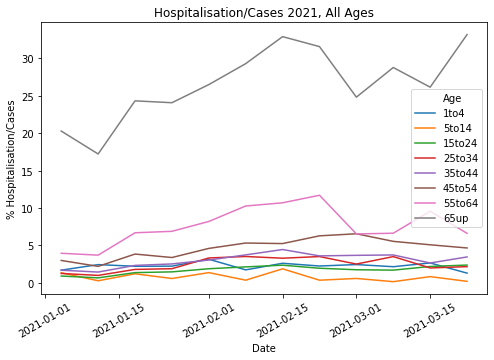

In [9]:
ax = sns.lineplot(data=weeklyadf[weeklyadf.Date>='2021-01-01'], x='Date', y='perchospitalisation', hue='Age')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('Hospitalisation/Cases 2021, All Ages')
plt.xticks(rotation=30);

### Ages 1-24 for 2021

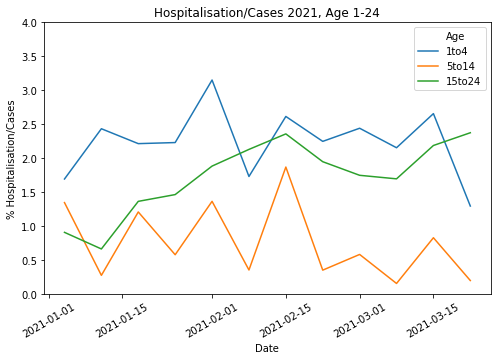

In [10]:
ax=sns.lineplot(data=weeklyadf[(weeklyadf.Date>='2021-01-01') & (weeklyadf.Age.isin(['1to4', '5to14', '15to24']))], x='Date', y='perchospitalisation', hue='Age')
ax.set_ylim((0, 4))
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('Hospitalisation/Cases 2021, Age 1-24')
plt.xticks(rotation=30);

### Ages 1-24 since September 2020

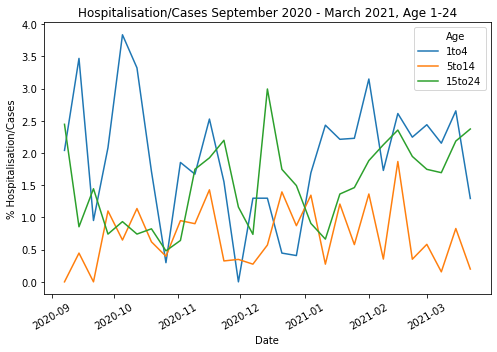

In [11]:
ax=sns.lineplot(data=weeklyadf[(weeklyadf.Date>='2020-09-01') & (weeklyadf.Age.isin(['1to4', '5to14', '15to24']))], x='Date', y='perchospitalisation', hue='Age')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('Hospitalisation/Cases September 2020 - March 2021, Age 1-24')
plt.xticks(rotation=30);

### Ages 1-24 for the entire dataset

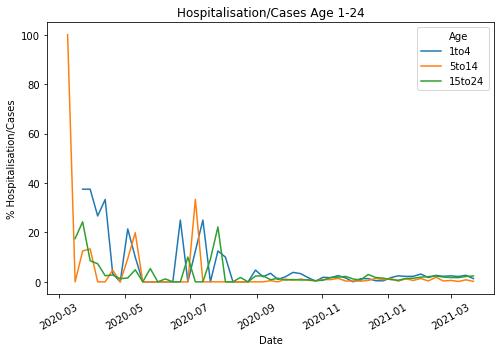

In [12]:
ax=sns.lineplot(data=weeklyadf[(weeklyadf.Age.isin(['1to4', '5to14', '15to24']))], x='Date', y='perchospitalisation', hue='Age')
ax.set_ylabel('% Hospitalisation/Cases')
ax.set_title('Hospitalisation/Cases Age 1-24')
plt.xticks(rotation=30);

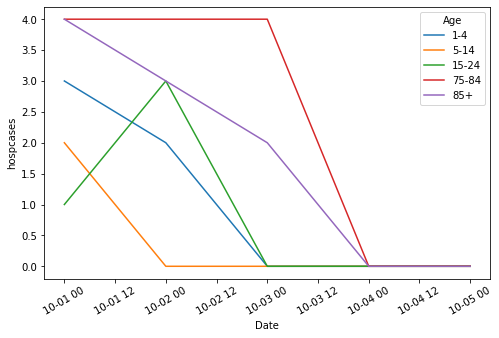

In [30]:
ax=sns.lineplot(data=dailyadf[(dailyadf.Date>='2021-10-01') & (dailyadf["Age"].isin(['1-4', '5-14', '15-24', '75-84', '85+']))], x='Date', y='hospcases', hue='Age')
#ax.set_title('HPSC 14-day reports: Hospital Cases 2021, Age 0-24, 75+')
#sns.despine(left=True, bottom=True)
plt.xticks(rotation=30);


In [22]:
{x:y for x,y in zip(dailyadf.Age.unique(), ['1-4', '5-14', '15-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+'])}

{'HospitalisedAged1to4': '1-4',
 'HospitalisedAged5to14': '5-14',
 'HospitalisedAged15to24': '15-24',
 'HospitalisedAged25to34': '25-34',
 'HospitalisedAged35to44': '35-44',
 'HospitalisedAged45to54': '45-54',
 'HospitalisedAged55to64': '55-64',
 'HospitalisedAged65to74': '65-74',
 'HospitalisedAged75to84': '75-84',
 'HospitalisedAged85up': '85+'}